In [1]:
#https://www.python-course.eu/neural_network_mnist.php
#Bu sayfadaki 2 tane .csv dosyasını çalıştığımız dosyaya indirdik.

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = "C:/Users/Ebru/Desktop/gi_deneme/ders4/" 
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",") 
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",") 

In [4]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [5]:
train_data.ndim,train_data.shape     #785 her bir resmin boyutu=28*28+1

(2, (60000, 785))

In [6]:
train_data[10,50] #10. satır 50. elemanı 

0.0

In [7]:
train_data[10,0] #10. satır 0. elemanı : eleman=3

3.0

In [8]:
im_3=train_data[10,:] #10. satırdaki elemanları komple im_3'e atar
im_3.shape 

(785,)

In [9]:
im_4=im_3[1:] 
im_4.shape 

(784,)

In [10]:
im_5=im_4.reshape(28,28)

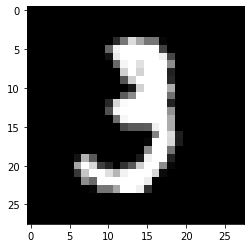

In [11]:
plt.imshow(im_5,cmap='gray')
plt.show()

In [12]:
#rakamlardan kaçar tane olduğunu bulan fonksiyon:

m,n=train_data.shape
m,n #sonuç=(60000,785)

def my_count(k=0):
    s=0
    for i in range (m):
        if(train_data[i,0]==k):
            s=s+1
    return s #kaç tane k değeri olduğunu bastırır.
for i in range(10):
    c=my_count(i)
    print(i," ",c) # 0-10 sayılarından kaçar tane olduğunu yazdırır.

0   5923
1   6742
2   5958
3   6131
4   5842
5   5421
6   5918
7   6265
8   5851
9   5949


In [13]:
#train_data[i,0]  #değeri söyler
#train_data[i,1]  #sol üstteki pixel
#train_data[i,784] #sağ alttaki değer

In [14]:
import math
def my_pdf_1(x,mu=0.0,sigma=1.0):
    x=float(x-mu)/sigma
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)/sigma

In [15]:
#değeri 0 olan resimlerin sol üstteki pixelin ortalama ve standart sapmasını bulan fonksiyon:
s,t,k=0,0,0
l=350 #lokasyon
for i in range (m):
    if(train_data[i,0]==k):
        s=s+1 #kaç tane var
        t=t+train_data[i,l+1] #instensity değerleri
mean_1=t/s #ortalama
s,t=0,0
for i in range (m):
    if(train_data[i,0]==k):
        s=s+1 #kaç tane var
        diff_1=train_data[i,l+1]-mean_1
        t=t+diff_1*diff_1
std_1=np.sqrt(t/(s-1))
print(mean_1,std_1)

22.705723450953908 61.8672005389669


In [25]:
#yukarıdaki kodları fonksiyon haline getirdik: 
def get_my_mean_and_std(k=0,l=0):
    s=0
    t=0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            t=t+train_data[i,l+1]
    mean_1=t/s

    s,t=0,0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            diff_1=train_data[i,l+1]-mean_1
            t=t+diff_1*diff_1
    std_1=np.sqrt(t/(s-1))
    return mean_1,std_1

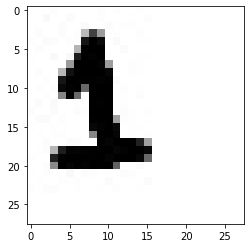

In [26]:
im_1=plt.imread('test_1.jpg')
plt.imshow(im_1)
plt.show()
test_value=im_1[0,0,0]

In [27]:
m_1,std_1=get_my_mean_and_std(2,100)
my_pdf_1(test_value,m_1,std_1)

8.939333047950803e-05

In [28]:
#ÖDEV: oluşturulan resmin hangi sayı olduğunu bulan fonksiyonu yazınız.